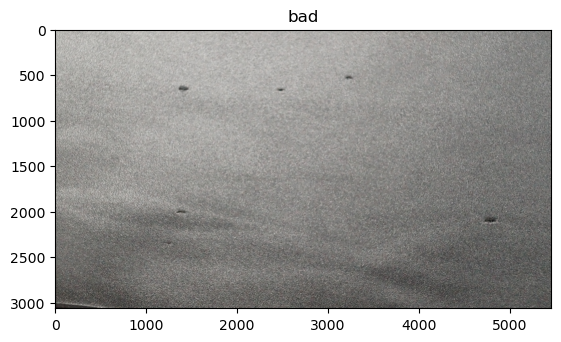

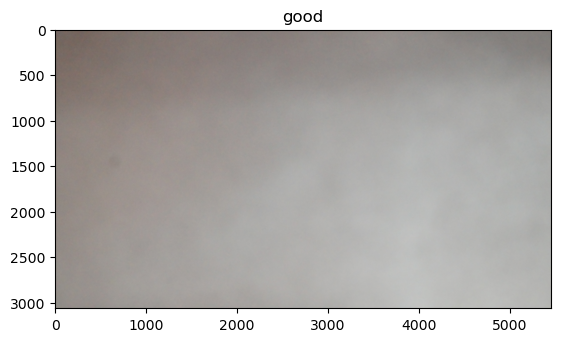

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Define constants
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
NUM_CHANNELS = 3
NUM_CLASSES = 2
BATCH_SIZE = 32
EPOCHS = 20

# Function to load dataset and show sample images
def load_and_show_samples(dataset_path):
    classes = ['bad', 'good']
    for cls in classes:
        img_path = os.path.join(dataset_path, cls)
        sample_img = os.listdir(img_path)[0]  # Taking the first image for each class
        img = image.load_img(os.path.join(img_path, sample_img))
        plt.imshow(img)
        plt.title(cls)
        plt.show()

# Function for data preprocessing
def preprocess_data(dataset_path):
    images = []
    labels = []
    classes = ['bad', 'good']
    for cls in classes:
        img_path = os.path.join(dataset_path, cls)
        for img in os.listdir(img_path):
            img = image.load_img(os.path.join(img_path, img), target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
            img = image.img_to_array(img)
            img = img / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(classes.index(cls))
    images = np.array(images)
    labels = to_categorical(labels, NUM_CLASSES)
    return images, labels

# Load and preprocess dataset
dataset_path = 'E:\\ULAB group\\leather'
load_and_show_samples(dataset_path)
images, labels = preprocess_data(dataset_path)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define custom CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANNELS)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [2]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE, validation_split=0.1)

Epoch 1/50
23/23 [==============================] - 10s 64ms/step - loss: 0.7886 - accuracy: 0.4882 - val_loss: 0.6628 - val_accuracy: 0.6667
Epoch 2/50
23/23 [==============================] - 1s 28ms/step - loss: 0.6628 - accuracy: 0.5795 - val_loss: 0.6114 - val_accuracy: 0.6667
Epoch 3/50
23/23 [==============================] - 1s 28ms/step - loss: 0.6304 - accuracy: 0.6127 - val_loss: 0.6110 - val_accuracy: 0.6543
Epoch 4/50
23/23 [==============================] - 1s 28ms/step - loss: 0.5838 - accuracy: 0.6266 - val_loss: 0.5652 - val_accuracy: 0.7037
Epoch 5/50
23/23 [==============================] - 1s 32ms/step - loss: 0.5722 - accuracy: 0.6777 - val_loss: 0.5647 - val_accuracy: 0.6790
Epoch 6/50
23/23 [==============================] - 1s 28ms/step - loss: 0.5323 - accuracy: 0.7068 - val_loss: 0.6043 - val_accuracy: 0.7407
Epoch 7/50
23/23 [==============================] - 1s 28ms/step - loss: 0.5210 - accuracy: 0.7192 - val_loss: 0.4906 - val_accuracy: 0.7654
Epoch 8/50
2

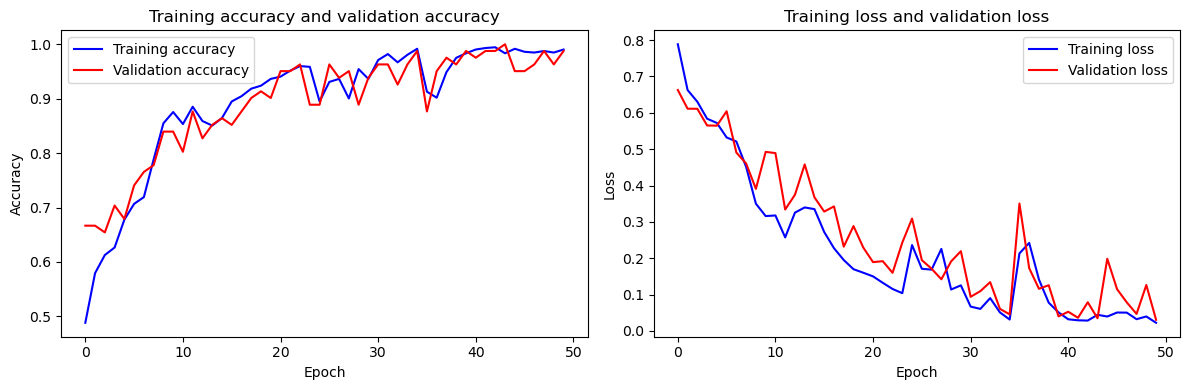

In [5]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy' , color='blue' )
plt.plot(history.history['val_accuracy'], label='Validation accuracy' , color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training accuracy and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss and validation loss')
plt.legend()
plt.tight_layout()
plt.show()




7/7 [==============================] - 0s 24ms/step


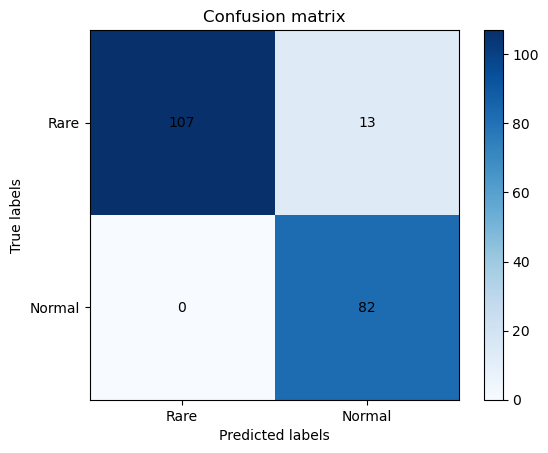

In [4]:
# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Display confusion matrix as heatmap with numbers inside cells
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(NUM_CLASSES), ['Rare', 'Normal'])
plt.yticks(np.arange(NUM_CLASSES), ['Rare', 'Normal'])
plt.title('Confusion matrix')
plt.show()

In [5]:
from sklearn.metrics import classification_report

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Display classification report
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))


7/7 [==============================] - 0s 7ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       120
           1       0.96      0.99      0.98        82

    accuracy                           0.98       202
   macro avg       0.98      0.98      0.98       202
weighted avg       0.98      0.98      0.98       202



7/7 [==============================] - 0s 59ms/step


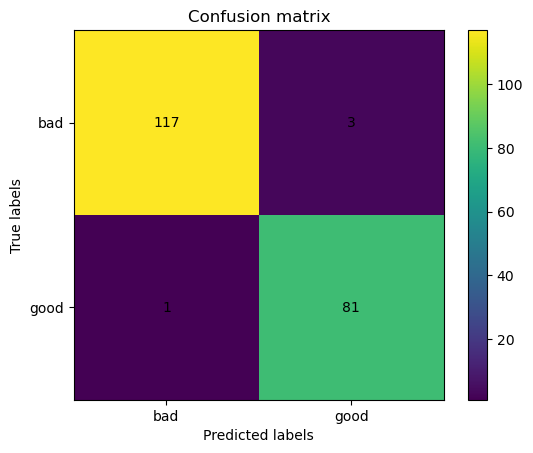

In [11]:
# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Display confusion matrix as heatmap with numbers inside cells
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.imshow(conf_matrix, cmap='viridis', interpolation='nearest')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(NUM_CLASSES), ['bad', 'good'])
plt.yticks(np.arange(NUM_CLASSES), ['bad', 'good'])
plt.title('Confusion matrix')
plt.show()


# VGG16

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
# Load the VGG16 model, pre-trained on ImageNet, excluding the top dense layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANNELS))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for our specific task
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE, validation_split=0.2)


Epoch 1/50
21/21 [==============================] - 13s 136ms/step - loss: 0.6108 - accuracy: 0.6874 - val_loss: 0.3336 - val_accuracy: 0.9441
Epoch 2/50
21/21 [==============================] - 1s 61ms/step - loss: 0.3294 - accuracy: 0.8771 - val_loss: 0.2835 - val_accuracy: 0.8758
Epoch 3/50
21/21 [==============================] - 1s 61ms/step - loss: 0.2599 - accuracy: 0.9020 - val_loss: 0.2163 - val_accuracy: 0.9255
Epoch 4/50
21/21 [==============================] - 1s 61ms/step - loss: 0.2075 - accuracy: 0.9331 - val_loss: 0.1954 - val_accuracy: 0.9317
Epoch 5/50
21/21 [==============================] - 1s 61ms/step - loss: 0.1999 - accuracy: 0.9269 - val_loss: 0.1635 - val_accuracy: 0.9565
Epoch 6/50
21/21 [==============================] - 1s 61ms/step - loss: 0.1765 - accuracy: 0.9440 - val_loss: 0.1667 - val_accuracy: 0.9255
Epoch 7/50
21/21 [==============================] - 1s 62ms/step - loss: 0.1680 - accuracy: 0.9456 - val_loss: 0.1481 - val_accuracy: 0.9441
Epoch 8/50


In [20]:
from sklearn.metrics import classification_report

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Display classification report
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))


7/7 [==============================] - 0s 45ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       120
           1       0.96      1.00      0.98        82

    accuracy                           0.99       202
   macro avg       0.98      0.99      0.98       202
weighted avg       0.99      0.99      0.99       202



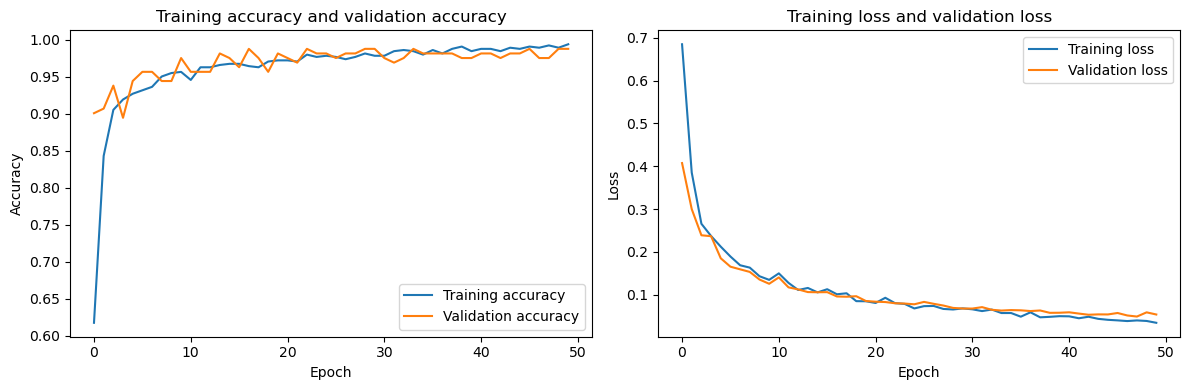

In [5]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training accuracy and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss and validation loss')
plt.legend()
plt.tight_layout()
plt.show()


7/7 [==============================] - 2s 255ms/step


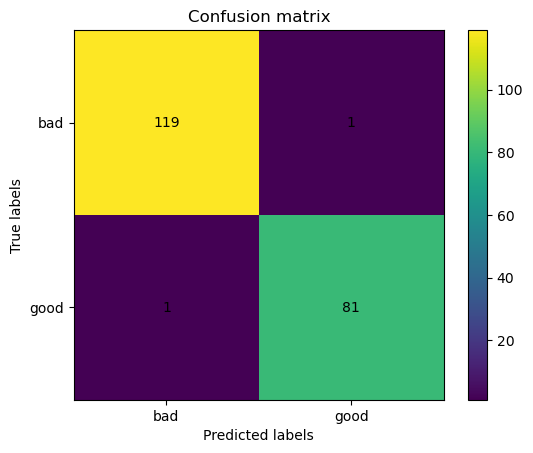

In [6]:
# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Display confusion matrix as heatmap with numbers inside cells
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.imshow(conf_matrix, cmap='viridis', interpolation='nearest')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(NUM_CLASSES), ['bad', 'good'])
plt.yticks(np.arange(NUM_CLASSES), ['bad', 'good'])
plt.title('Confusion matrix')
plt.show()


# Inception V3

In [17]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
# Load the InceptionV3 model, pre-trained on ImageNet, excluding the top dense layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANNELS))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for our specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE, validation_split=0.2)


Epoch 1/50
21/21 [==============================] - 9s 146ms/step - loss: 0.5728 - accuracy: 0.6439 - val_loss: 0.4059 - val_accuracy: 0.8509
Epoch 2/50
21/21 [==============================] - 1s 46ms/step - loss: 0.4019 - accuracy: 0.8491 - val_loss: 0.3444 - val_accuracy: 0.8882
Epoch 3/50
21/21 [==============================] - 1s 46ms/step - loss: 0.3341 - accuracy: 0.8849 - val_loss: 0.2978 - val_accuracy: 0.9068
Epoch 4/50
21/21 [==============================] - 1s 45ms/step - loss: 0.2723 - accuracy: 0.9269 - val_loss: 0.2621 - val_accuracy: 0.9068
Epoch 5/50
21/21 [==============================] - 1s 46ms/step - loss: 0.2374 - accuracy: 0.9238 - val_loss: 0.2359 - val_accuracy: 0.9130
Epoch 6/50
21/21 [==============================] - 1s 46ms/step - loss: 0.2117 - accuracy: 0.9409 - val_loss: 0.2181 - val_accuracy: 0.9193
Epoch 7/50
21/21 [==============================] - 1s 45ms/step - loss: 0.1889 - accuracy: 0.9518 - val_loss: 0.1998 - val_accuracy: 0.9317
Epoch 8/50
2

In [18]:
from sklearn.metrics import classification_report

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Display classification report
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))


7/7 [==============================] - 2s 63ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       120
           1       0.98      1.00      0.99        82

    accuracy                           0.99       202
   macro avg       0.99      0.99      0.99       202
weighted avg       0.99      0.99      0.99       202



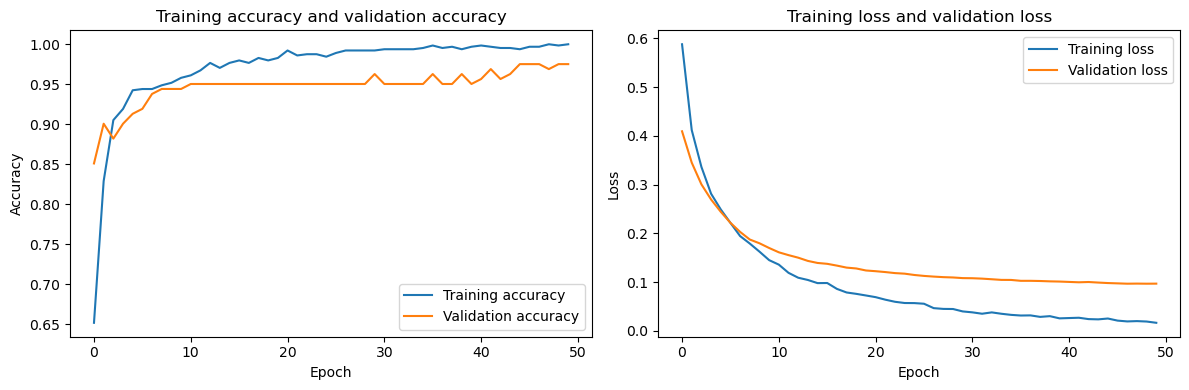

In [9]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training accuracy and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss and validation loss')
plt.legend()
plt.tight_layout()
plt.show()


7/7 [==============================] - 2s 75ms/step


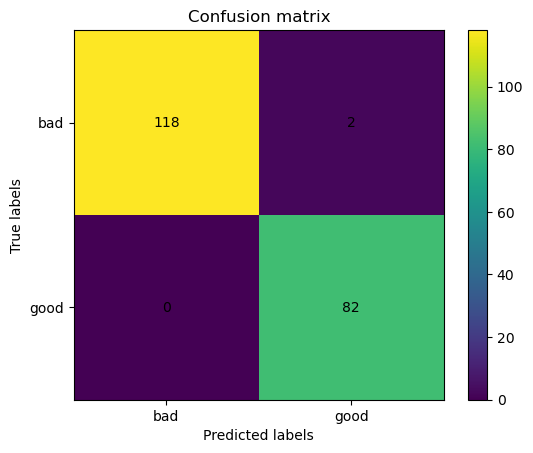

In [10]:
# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Display confusion matrix as heatmap with numbers inside cells
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.imshow(conf_matrix, cmap='viridis', interpolation='nearest')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(NUM_CLASSES), ['bad', 'good'])
plt.yticks(np.arange(NUM_CLASSES), ['bad', 'good'])
plt.title('Confusion matrix')
plt.show()


# Xception

In [12]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

# Load the Xception model, pre-trained on ImageNet, excluding the top dense layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANNELS))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for our specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/50
21/21 [==============================] - 6s 101ms/step - loss: 0.6536 - accuracy: 0.6547 - val_loss: 0.4759 - val_accuracy: 0.8199
Epoch 2/50
21/21 [==============================] - 1s 45ms/step - loss: 0.4888 - accuracy: 0.8134 - val_loss: 0.4120 - val_accuracy: 0.8571
Epoch 3/50
21/21 [==============================] - 1s 44ms/step - loss: 0.4308 - accuracy: 0.8351 - val_loss: 0.3814 - val_accuracy: 0.8820
Epoch 4/50
21/21 [==============================] - 1s 45ms/step - loss: 0.4005 - accuracy: 0.8849 - val_loss: 0.3594 - val_accuracy: 0.8882
Epoch 5/50
21/21 [==============================] - 1s 45ms/step - loss: 0.3749 - accuracy: 0.8974 - val_loss: 0.3416 - val_accuracy: 0.8882
Epoch 6/50
21/21 [==============================] - 1s 45ms/step - loss: 0.3571 - accuracy: 0.8880 - val_loss: 0.3290 - val_accuracy: 0.9006
Epoch 7/50
21/21 [==============================] - 1s 45ms/step - loss: 0.3443 - accuracy: 0.9051 - val_loss: 0.3167 - val_accuracy: 0.9006
Epoch 8/50
2

In [16]:
from sklearn.metrics import classification_report

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Display classification report
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))


7/7 [==============================] - 0s 69ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       120
           1       0.85      1.00      0.92        82

    accuracy                           0.93       202
   macro avg       0.93      0.94      0.93       202
weighted avg       0.94      0.93      0.93       202



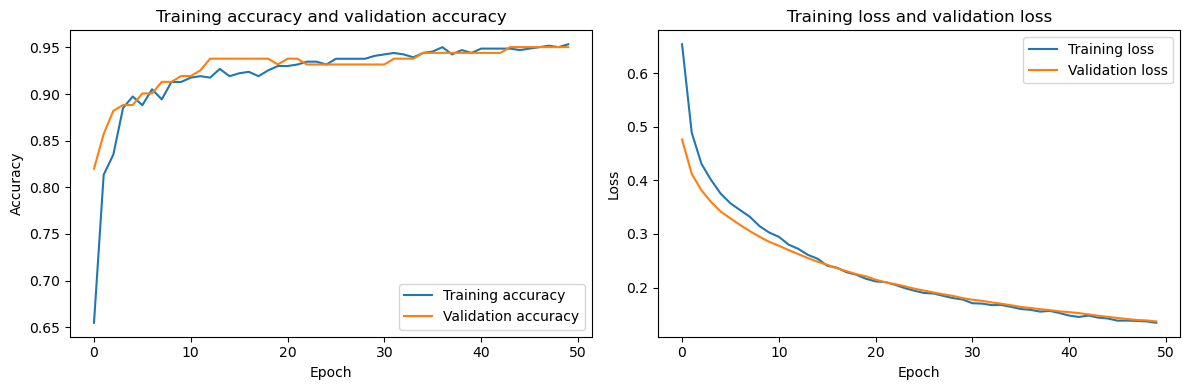

In [14]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training accuracy and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss and validation loss')
plt.legend()
plt.tight_layout()
plt.show()

7/7 [==============================] - 1s 53ms/step


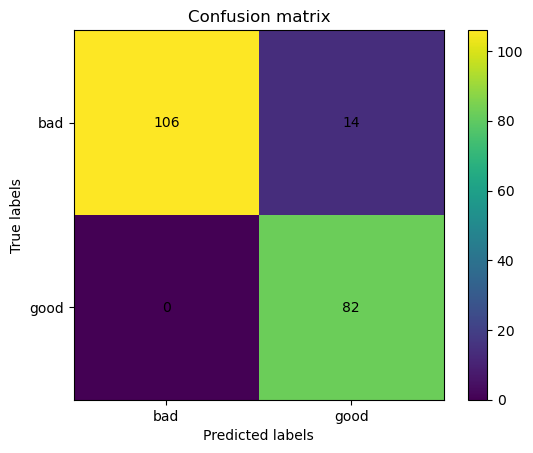

In [15]:
# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Display confusion matrix as heatmap with numbers inside cells
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.imshow(conf_matrix, cmap='viridis', interpolation='nearest')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(NUM_CLASSES), ['bad', 'good'])
plt.yticks(np.arange(NUM_CLASSES), ['bad', 'good'])
plt.title('Confusion matrix')
plt.show()


# DenseNet

In [22]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

# Load the DenseNet121 model, pre-trained on ImageNet, excluding the top dense layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANNELS))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for our specific task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=BATCH_SIZE, validation_split=0.2)



Epoch 1/50
21/21 [==============================] - 13s 219ms/step - loss: 0.9865 - accuracy: 0.4961 - val_loss: 0.5568 - val_accuracy: 0.7081
Epoch 2/50
21/21 [==============================] - 2s 74ms/step - loss: 0.6145 - accuracy: 0.6594 - val_loss: 0.4233 - val_accuracy: 0.8261
Epoch 3/50
21/21 [==============================] - 2s 75ms/step - loss: 0.4724 - accuracy: 0.7916 - val_loss: 0.3541 - val_accuracy: 0.8758
Epoch 4/50
21/21 [==============================] - 2s 74ms/step - loss: 0.3969 - accuracy: 0.8305 - val_loss: 0.3039 - val_accuracy: 0.8882
Epoch 5/50
21/21 [==============================] - 2s 74ms/step - loss: 0.3187 - accuracy: 0.8974 - val_loss: 0.2683 - val_accuracy: 0.9068
Epoch 6/50
21/21 [==============================] - 2s 74ms/step - loss: 0.2765 - accuracy: 0.8989 - val_loss: 0.2409 - val_accuracy: 0.9068
Epoch 7/50
21/21 [==============================] - 2s 76ms/step - loss: 0.2609 - accuracy: 0.9114 - val_loss: 0.2186 - val_accuracy: 0.9068
Epoch 8/50


In [23]:
from sklearn.metrics import classification_report

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Display classification report
print("Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))


7/7 [==============================] - 3s 92ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       120
           1       0.93      1.00      0.96        82

    accuracy                           0.97       202
   macro avg       0.97      0.97      0.97       202
weighted avg       0.97      0.97      0.97       202



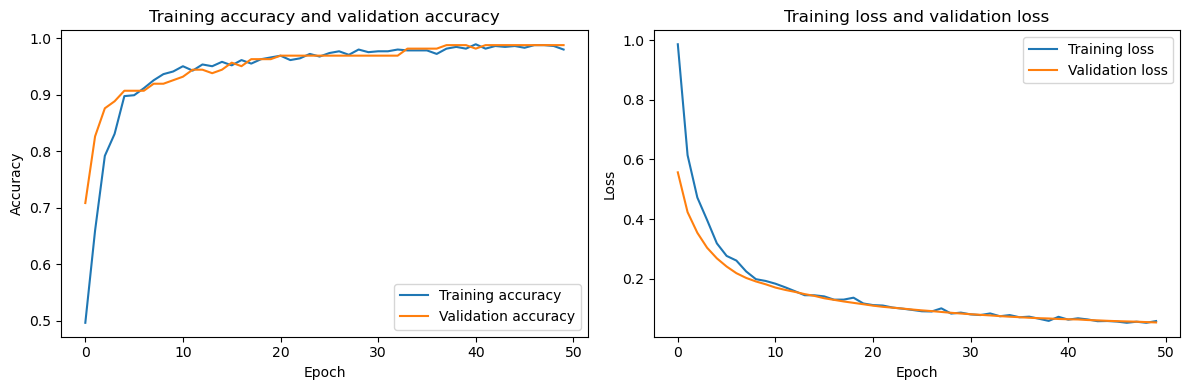

In [24]:
# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training accuracy and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss and validation loss')
plt.legend()
plt.tight_layout()
plt.show()

7/7 [==============================] - 0s 53ms/step


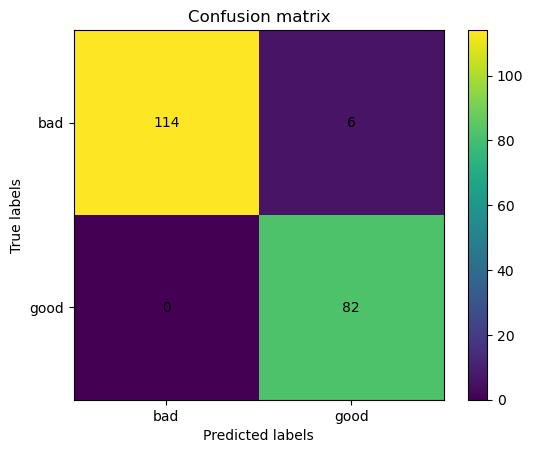

In [25]:
# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Display confusion matrix as heatmap with numbers inside cells
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

plt.imshow(conf_matrix, cmap='viridis', interpolation='nearest')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(NUM_CLASSES), ['bad', 'good'])
plt.yticks(np.arange(NUM_CLASSES), ['bad', 'good'])
plt.title('Confusion matrix')
plt.show()


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical

# Define constants
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
NUM_CHANNELS = 3
NUM_CLASSES = 2
BATCH_SIZE = 32
EPOCHS = 20

# Function to load dataset and show sample images
def load_and_show_samples(dataset_path):
    classes = ['bad', 'good']
    for cls in classes:
        img_path = os.path.join(dataset_path, cls)
        sample_img = os.listdir(img_path)[0]  # Taking the first image for each class
        img = image.load_img(os.path.join(img_path, sample_img))
        plt.imshow(img)
        plt.title(cls)
        plt.show()

# Function for data preprocessing
def preprocess_data(dataset_path):
    images = []
    labels = []
    classes = ['bad', 'good']
    for cls in classes:
        img_path = os.path.join(dataset_path, cls)
        for img in os.listdir(img_path):
            img = image.load_img(os.path.join(img_path, img), target_size=(IMAGE_WIDTH, IMAGE_HEIGHT))
            img = image.img_to_array(img)
            img = preprocess_input(img)  # Preprocess input for VGG16
            images.append(img)
            labels.append(classes.index(cls))
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load and preprocess dataset
dataset_path = 'E:\\ULAB group\\leather'
load_and_show_samples(dataset_path)
images, labels = preprocess_data(dataset_path)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load the VGG16 model, pre-trained on ImageNet, excluding the top dense layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, NUM_CHANNELS))
model = Model(inputs=base_model.input, outputs=base_model.output)

# Extract features using VGG16
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

# Flatten the features
X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features = X_test_features.reshape(X_test_features.shape[0], -1)

# Standardize the features
scaler = StandardScaler()
X_train_features = scaler.fit_transform(X_train_features)
X_test_features = scaler.transform(X_test_features)

# Train the SVC model
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(X_train_features, y_train)

# Make predictions
y_pred = svc.predict(X_test_features)

# Print classification report
print(classification_report(y_test, y_pred, target_names=['bad', 'good']))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


7/7 [==============================] - 0s 43ms/step


ValueError: y should be a 1d array, got an array of shape (804, 2) instead.